# Fontes, sumidouros e dipolos

- PET - Física
- Petiano: Gabriel Wendell Celestino Rocha
- Data: 19 de Janeiro de 2022

O objetivo desse `Notebook` é servir como uma introdução a Aerodinâmica Clássica Computacional e abordar o conceitos de **fontes**, **sumidouros** e **dipolos** no âmbito da Aerodinâmica Clássica. Além disso, também visa servir como uma "continução" ou "expansão" dos `Notebooks` sobre Dinâmica de Fluídos Computacional presentes nas referências [1] e [2].

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em quatro seções (três seções expositivas mais uma seção extra):

1. **Fontes & Sumidouros**;
2. **Fontes & Sumidouros em fluxo livre**;
3. **Dipolos**;
4. **Para raciocinar um pouco mais...**

Na primeira seção iremos realizar uma introdução teórica acerca do conceito de fontes (*source*) e sumidouro (*sink*), passando desde a fundamentação teórica e matemática destes conceitos até a simulação computacional dos mesmos.

Já na segunda seção será feita a mesma exposição feita na seção anterior acerca de fontes e sumidouros, porém quando estes são introduzidos em um tipo particular de fluxo conhecido como **fluxo livre** (*freestream*) e avaliar o comportamento destes neste tipo de fluxo.

Nesta penúltima seção, será abordado o conceito de dipolos (*doublets*) bem como uma descrição matemática para em seguida avaliar o comportamento dos dipolos através de algumas simulações computacionais.

Por fim, a última opção intitulada *Para raciocinar um pouco mais...* é uma seção puramente opcional que visa estimular um aprofundamento ao apresentar alguns problemas conceituais, computacionais e matemáticos envolvendo os conceitos abordados ao longo deste `Notebook`. Além disso, ao final de cada seção, há uma pequena subseção intitulada *Para refletir...* com algumas perguntas conceituais interessantes a se pensar acerca do conteúdo explorada naquela seção. 

## Pré-requisitos

Uma vez que este `Notebook` visa servir como uma introdução à Aerodinâmica Clássica Computacional, é recomendável que o leitor passe pelos `Notebooks` [convecção, difusão e a equação de Burgers](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Convecção%2C%20difusão%20e%20a%20equação%20de%20Burgers.ipynb) [1] e [a equação de Navier-Stokes bidimensional](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20equação%20de%20Navier-Stokes%202D.ipynb) [2], uma vez que alguns conceitos abordados neste `Notebook` são apresentados (ainda que brevemente) nestes outros `Notebooks`. Além disso, a fundamentação teórica com um detalhamento matemático mais rigoroso dos conceitos expostos neste `Notebook` podem ser encontrados no livro *Fluid Mechanics*, de P. K. Kundu & I. M. Cohen [3].

### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

Curiosamente, na contramão dos outros `Notebooks`, para a realização deste em particular será necessário uma quantidade muito diminuta de bibliotecas (apenas duas) que serão apenas as bibliotecas fundamentais necessárias para a realização de qualquer `Notebook`.

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.7.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.10.0
OS Windows 10 10.0.19041 SP0
Matplotlib 3.1.2
Numpy 1.19.0
Fri Nov 19 14:14:16 2021 Hora Padrão de Buenos Aires

Para instalar a magic extension `%version_information` do `IPython` usando o `pip`, execute a seguinte linha de comando em um terminal de sua preferência:

`pip install version_information`

Feito essas explicações, vamos ao `Notebook` propriamente dito.

## 1. Fontes & Sumidouros

A base teórica da *aerodinâmica clássica* é a **teoria do fluxo potencial**, um aparato matemático que foi o ponto vital da aerodinâmica ao longo de seu crescimento até a maturidade durante a maior parte do século XX. 

Tudo começa com algumas simplificações:

- o fluxo é constante;
- a velocidade permanece menor que a velocidade do som (fluxo incompressível);
- o fluído não possui atrito interno, ou seja, é invíscido;
- não há vorticidade (as partículas do fluído não estão rotacionando).

Isso soa como uma grande quantidade de simplificações, certo? Acontece que grande parte da aerodinâmica pode ser aproximada desta forma! Os efeitos viscosos são normalmente confinados a uma camada limite muito fina (e podemos corrigir a teoria potencial para explicar isso), e muitos fluxos são efetivamente irrotacionais (exceto para pontos isolados, linhas ou folhas). E, finalmente, a maioria das aplicações em que estamos interessados permanecem subsônicos.

A teoria do fluxo potencial tem uma qualidade matemática muito agradável: **é linear**. Isso significa que o *princípio da superposição* se aplica e podemos construir novas soluções adicionando soluções conhecidas.

Nesta primeira parte deste `Notebook`, o leitor aprenderá duas soluções elementares de fluxo pontencial: a *fonte*, e o *sumidouro*. E, adivinhe, você os adicionará para gerar uma nova solução conhecida como **par fonte-sumidouro**.

### 1.1 Fundamentos matemáticos

Primeiramente, vamos aprender a base matemática na qual iremos nos basear daqui pra frente. Comecemos relembrando a definição de *circulação*:

$$\boxed{\Gamma=\oint\textbf{v}\cdot d\overrightarrow{\ell}}$$

Em outras palavras, a circulação é a integral de linha da velocidade em torno de um contorno fechado. Relembre o *Teorema de Stokes*. Tal teorema nos informa que esta integral de linha é igual ao fluxo através do contorno da onda de velocidade, que por sua vez é a **vorticidade**: $\omega=\nabla\times\textbf{v}$.

$$\oint\textbf{v}\cdot d\overrightarrow{\ell}=\int\int_{s}\omega\cdot\overrightarrow{n}ds$$

Se a vorticidade é nula (fluxo irrotacional), então a circulação ao redor de qualquer contorno fechado é também nulo. Isso significa que a integral de linha da velocidade para qualquer curva indo de um ponto $A$ até $B$ deve ser igual e oposta àquela de qualquer curva indo de $B$ até $A$. Expandindo o produto escalar na integral, onde a velocidade é $\textbf{v}=(u,v,w)$:

$$\int_{A}^{B}\textbf{v}\cdot d\overrightarrow{\ell}=\int_{A}^{B}udx+vdy+wdz$$

No fluxo irrotacional, não importa o caminho tomado, tal integral de linha de $A$ até $B$ possui sempre o mesmo valor. Agora, relembrando dos conceitos do Cálculo Vetorial, isso significa que $udx+vdy+wdz$ é uma [diferencial exata](https://www.britannica.com/topic/exact-equation) de um potencial $\phi$, onde

$$u=\frac{\partial\phi}{\partial x}$$

$$v=\frac{\partial\phi}{\partial y}$$

$$w=\frac{\partial\phi}{\partial z}$$

Ou, para abreviar: $\textbf{v}=\nabla\phi$. Aplicando a equação da continuidade para um fluxo incompressível, $\nabla\cdot\textbf{v}=0$, obtemos a equação governante lindamente simples do fluxo potencial:

$$\boxed{\nabla^{2}\phi=0}$$

Esta é a famigerada **equação de Laplace!** 

Portanto, qualquer solução para a equação de Laplace pode ser um fluxo potencial, e aqui vamos nós.

### 1.2 Fluxo de uma fonte e de um sumidouro

Desejamos expressar numericamente o campo de fluxo de uma fonte e de um sumidouro (duas soluções de fluxo potenciais), para que possamos traçar esses fluxos e admirá-los.

Nosso objetivo nessa etapa é visualizar os fluxos correspondentes a uma fonte e a um sumidouro. Para fazer isso, é necessário primeiramente definir um conjunto de pontos onde os componentes da velocidade serão calculados.

Começamos definindo uma grade cartesiana de pontos uniformemente espaçados dentro de um domínio espacial que possui 4 unidades de comprimento na direção $x$ e 2 unidades de comprimento na direção $y$, ou seja, $x,y\in[-2,2],[-1,1]$.

Definiremos uma variável `N` que será o número de pontos que desejamos em cada direção, e definimos os limites computacionais pelas variáveis `x_start`, `x_end`, `y_start` e `y_end`.

Além disso, vamos usar a função [`linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) do NumPy para criar duas matrizes 1D que contêm os valores uniformemente espaçados das coordenadas $x$ e $y$, correspondendo aos nossos pontos da grade. A última linha do bloco de código abaixo chama a função [`meshgrid()`](https://docs.scipy.org/doc/numpy-1.4.x/reference/generated/numpy.meshgrid.html), que gera arrays contendo as coordenadas dos pontos onde a solução numérica é calculada.

In [3]:
N = 50                                
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = np.linspace(x_start, x_end, N)    
y = np.linspace(y_start, y_end, N)    

print('x = ', x)
print('y = ', y)

X, Y = np.meshgrid(x, y)              

x =  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y =  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.

Agora que a grade de malha foi gerada, vamos dar uma visualizada na mesma usando a função [`scatter()`](https://matplotlib.org/2.0.2/api/pyplot_api.html) do Matplotlib:

<IPython.core.display.Javascript object>


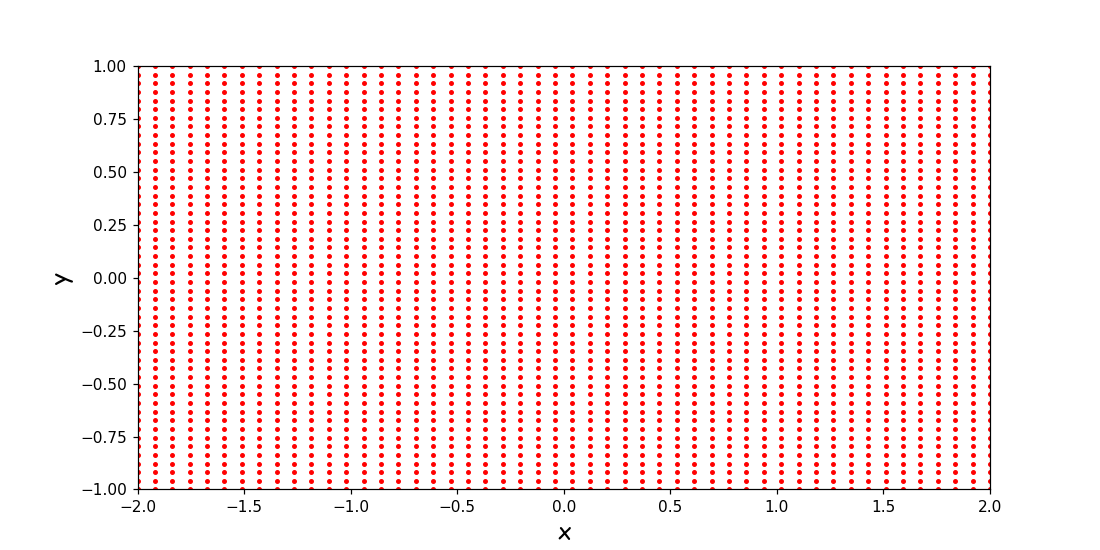

In [4]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.scatter(X, Y, s=5, color='red', marker='o')
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

plt.savefig('Grade de malha.png')

Vamos calcular o vetor de velocidade correspondente a um fluxo de origem em todos esses pontos bem ordenados. Em seguida, vamos traçar as linhas de fluxo.  

### 1.3 Fluxo de uma fonte

Nós mencionamos antes a melhor qualidade do fluxo potencial: a equação governante é linear e suas soluções podem ser construídas a partir de uma superposição. Por este motivo, é muito útil ter uma caixa de ferramentas de soluções elementares que podemos usar como blocos de construção. Fontes e sumidouros são justamente essas *soluções elementares*.

**Uma fonte é um ponto a partir do qual se supõe que o fluído está fluindo uniformemente**. Dessa forma, todas as linhas de orrente irradiam de um único ponto como linhas retas e a velocidade radial diminui com a distância do ponto de origem. Vamos considerar o caso puramente bidimensional. Por causa da simetria radial, é conveniente usar um sistema de coordenadas cilíndricas, $(r,\theta)$. O ângulo $\theta$ é $\tan^{-1}(y/x)$. As componentes da velocidade (radial e tangencial) são:

$$u_{r}=(r,\theta)=\frac{\sigma}{2\pi r},$$

$$u_{\theta}(r,\theta)=0$$

onde $\sigma$ representa a *intensidade da fonte*. 

É fácil ver que a velocidade tangencial é nula, uma vez que temos a exigência de que as linhas de corrente irradiem como linhas retas. Vamos determinar a componente radial da velocidade. Começamos aplicando a condição de irrotacionalidade, ou seja, $\omega=0$, em coordenadas cilíndricas (além disso, veremos que a velocidade só pode ser uma função de $r$). Em seguida, aplica-se a equação de continuidade. Com isso, se obtém facilmente o resultado desejado (recomenda-se ao leitor tentar desenvolver tais cálculos no papel).

Para aqueles que já estudaram Mecânica dos Fluídos, provavelmente irá se recordar da função de fluxo. Entretanto, estamos trabalhando em coordenadas cilíndricas. Portanto, $\psi$ é obtido a partir de:

$$\frac{1}{r}\frac{\partial\psi}{\partial\theta}=u_{r},$$

$$-\frac{\partial\psi}{\partial r}=u_{\theta}$$

que por sua vez resulta ao ser integrado

$$\boxed{\psi=\frac{\sigma}{2\pi}\theta+\text{constante}}$$

Em problemas práticos, geralmente se está interessado nas componentes da velocidade que são obtidas pela diferenciação da função de fluxo, de modo que a constante possa ser descartada.

Em coordenadas cartesianas, o campo de velocidade $(u,v)$ na posição $(x,y)$ corresponde a uma fonte de intensidade (ou de força) $\sigma$ localizada em $(x_{fonte}, y_{fonte})$ é dada por:

$$u=\frac{\partial\psi}{\partial y}=\frac{\sigma}{2\pi}\frac{x-x_{fonte}}{(x-x_{fonte})^{2}+(y-y_{fonte})^{2}}$$

$$v=-\frac{\partial\psi}{\partial x}=\frac{\sigma}{2\pi}\frac{y-y_{fonte}}{(x-x_{fonte})^{2}+(y-y_{fonte})^{2}}$$

Vamos calcular o campo de velocidade para nossa grade de pontos. Para isso, colocaremos a fonte no local $(-1,0)$ e daremos a ela uma intensidade igual a $\sigma=5$.

Ao invés de se escolher um ponto na grade e então calcular sua velocidade (o que significa que teríamos que iterar todas as posições `[i,j]`), calcula-se diretamente as matrizes de velocidade (`u_source`,`v_source`) usando operados aritméticos nas matrizes.

In [5]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0

# Calcula o campo de velocidade na grade da malha.
u_source = (strength_source / (2 * np.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (strength_source / (2 * np.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

Como de costume, vamos definir uma função para melhorar a estética dos nossos plots:

In [6]:
def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length=8,width=1,labelsize=15)

Vamos agora traçar as linhas de fluxo. Para isso vamos as funções [`streamplot()`](https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html) e [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) do Matplotlib para traçarmos as linhas aerodinâmicas:

<IPython.core.display.Javascript object>


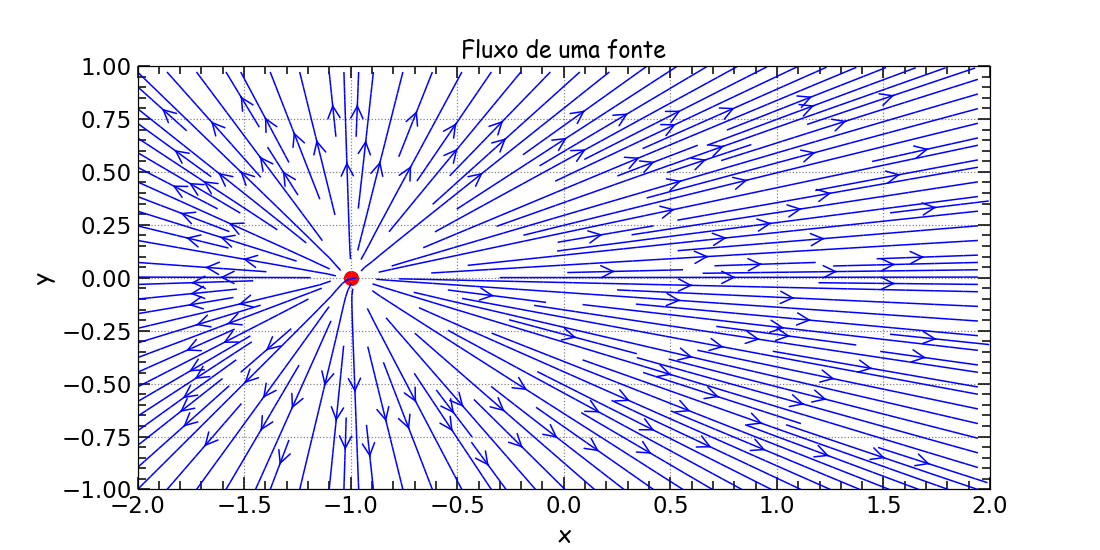

In [7]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Fluxo de uma fonte', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_source, v_source, 
               density=2, linewidth=1, arrowsize=2, color='blue', arrowstyle='->')
plt.scatter(x_source, y_source, color='red', s=80, marker='o')
opt_plot()

plt.savefig('Fluxo de uma fonte.png')

Interessante. Assim como se imaginava que uma fonte deveria aparecer, apenas mais bonita.

### 1.4 Fluxo de um sumidouro

No fluxo de uma fonte, a força $\sigma$ foi escolhida de forma a ser positiva. Uma fonte com intensidade *negativa* é chamada de **sumidouro**. Ao invés de irradiar a partir de um único ponto, as linhas de fluxo passam a assumir a forma de linhas retas convergentes para um único ponto.

O campo de velocidades correpondente a um sumidouro é semelhante ao de uma fonte, exceto pela direção do fluxo. Portanto, o código Python requer pouquíssimas modificações.

Vamos colocar o sumidouro no local $(1,0)$ e dar-lhe uma intensidade igual em módulo à da nossa fonte, entretanto com sinal contrário.

In [8]:
strength_sink = -5.0                    
x_sink, y_sink = 1.0, 0.0                

# Calcula o campo de velocidade na grade da malha.
u_sink = (strength_sink / (2 * np.pi) *
          (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (strength_sink / (2 * np.pi) *
          (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

Analogamente ao que foi feito anteriormente, vamos traçar as linhas aerodinâminas:

<IPython.core.display.Javascript object>


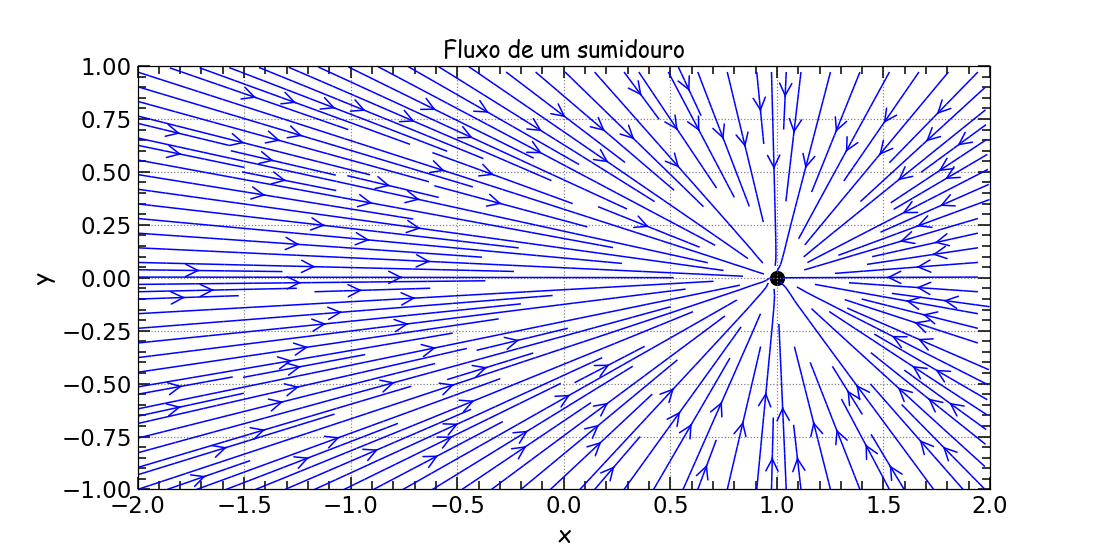

In [9]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Fluxo de um sumidouro', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_sink, v_sink, 
               density=2, linewidth=1, arrowsize=2, color='blue', arrowstyle='->')
plt.scatter(x_sink, y_sink, color='black', s=80, marker='o')
opt_plot()

plt.savefig('Fluxo de um sumidouro.png')

### 1.5 Par fonte-sumidouro

Agora, vamos exercitar nossas poderes de superposição. Uma vez que temos o campo de velocidade da fonte e o campo de velocidade do sumidouro, podemos apenas adicionar esses campos de velocidade, em termos de pontos, para obter uma nova solução de fluxo potencial: o **par fonte-sumidouro**.

Começamos calculando a velocidade do par fonte-sumidouro através de superposição:

In [10]:
u_pair = u_source + u_sink
v_pair = v_source + v_sink

Finalmente, plotamos as linhas aerodinâmicas do par fonte-sumidouro:

<IPython.core.display.Javascript object>


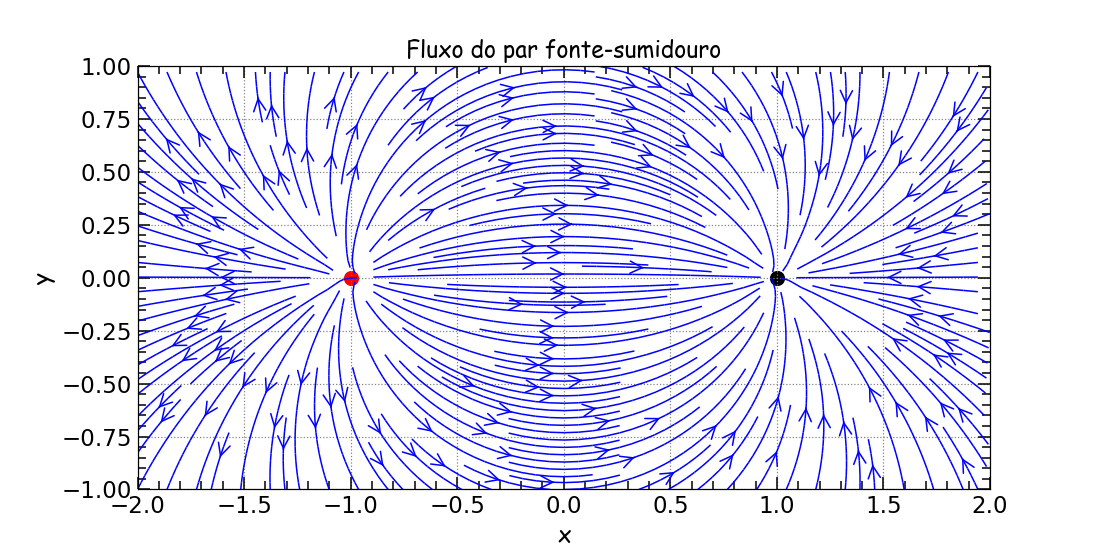

In [11]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Fluxo do par fonte-sumidouro', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_pair, v_pair, 
               density=2, linewidth=1, arrowsize=2, color='blue', arrowstyle='->')
# plt.scatter([x_source, x_sink], [y_source, y_sink], color='red/black', s=80, marker='o');
plt.scatter(x_source, y_source, color='red', s=80, marker='o')
plt.scatter(x_sink, y_sink, color='black', s=80, marker='o')
opt_plot()

plt.savefig('Fluxo do par fonte-sumidouro.png')

#### Para refletir...

- Experimente alterar a posição da fonte e do sumidouro além de torná-los mais ou menos intensos. O que acontece nessas condições?

- Tente escrever seu próprio código para traçar as linhas potenciais, em vez das linhas de fluxo (você pode querer usar a função [`contour()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) do Matplotlib para tal tarefa).

- Qual é o fluxo de massa total para fora de uma pequena superfície fechada ao redor da fonte?

---

## 2. Fontes & Sumidouros em um fluxo livre

Nesta seção iremos contruir uma solução de fluxo potencial adicionando uma fonte, um sumidouro e um fluxo (ou corrente) livre uniforme. Para isso vamos nos utilizar da propriedade agradável do fluxo potencial: o fato dele ser linear e obedecer à superposição. Tal fato decorre como consequência de o fluxo potencial ser governado pela equação de Laplace: $\nabla^{2}\phi=0$.

Para podermos visualizar as linhas de fluxo, precisaremos criar uma grade de pontos onde calcularemos as velocidades. Isso foi feito na seção anterior, então podemos simplemente copiar e colar o código aqui:

In [12]:
N = 200                               
x_start, x_end = -4.0, 4.0           
y_start, y_end = -2.0, 2.0            
x = np.linspace(x_start, x_end, N)    
y = np.linspace(y_start, y_end, N)    
X, Y = np.meshgrid(x, y)

Agora temos posse do conjunto de pontos, e as duas matrizes `X` e `Y` que contêm suas coordenadas $x$ e $y$, (respectivamente) de cada ponto na grade retangular (assim como foi feito antes).

### 2.1 Fonte em um fluxo uniforme

Na seção anterior, calculamos o campo de velocidades de uma fonte e de um dissipador. Vamos primeiro sobrepor uma fonte em um fluxo (corrente) uniforme e avaliar o que acontece.

As linhas de corrente de um fluxo livre com velocidade $U_{\infty}$ e ângulo de ataque $\alpha$ são dadas por:

$$\psi_{fluxo-livre}(x,y)=U_{\infty}(y\cos{\alpha}-s\sin{\alpha})$$

Pense da seguinte forma: as linhas de corrente serão em sua totalidade retas e paralelas de tal forma que forma um ângulo $\alpha$ com o eixo $x$. Se o fluxo for totalmente horizontal, então $\psi=U_{\infty}y$, cuja integração resulta em: $u=U_{\infty}$ e $v=0$.

Vamos começar preenchendo as matrizes que contêm as velocidades $u$ e $v$ e a função corrente para um fluxo horizontal uniforme $(U_{\infty},\alpha=0)$, em cada ponto de nossa grade.

In [13]:
u_inf = 1.0        # Velocidade do(a) fluxo (corrente) livre

# Calcula o campo de velocidades em um(a) fluxo (corrente) livre
u_freestream = u_inf * np.ones((N, N), dtype = float)
v_freestream = np.zeros((N, N), dtype = float)

# Calcula a função corrente
psi_freestream = u_inf * Y

Como foi discutido na seção anterior, a função de corrente de um fluxo cuja origem está localizada em $(x_{fonte},y_{fonte})$ é:

$$\boxed{\psi_{fonte}(x,y)=\frac{\sigma}{2\pi}\cdot\arctan{\Bigg(\frac{y-y_{fonte}}{x-x_{fonte}}\Bigg)}}$$

E as componentes da velocidade serão:

$$u_{fonte}(x,y)=\frac{\sigma}{2\pi}\frac{x-x_{fonte}}{(x-x_{fonte})^{2}+(y-y_{fonte})^{2}}$$

$$v_{fonte}(x,y)=\frac{\sigma}{2\pi}\frac{y-y_{fonte}}{(x-x_{fonte})^{2}+(y-y_{fonte})^{2}}$$

Não se esqueça que a função do fluxo e o campo de velocidades de uma fonte e de um sumidouro são exatamente os mesmos, porém as forças possuem sinais opostos (força positiva em um e negativa no outro).

Podemos escrever funções que têm um duplo propósito: com $\sigma$ positivo, elas fornecem a função da velocidade e fluxo de uma fonte, e fornecem as mesmas informações para um sumidouro caso tenhamos um $\sigma$ negativo.

Vamos definir uma função chamada `get_velocity()` para calcular as componentes da velocidade $(u,v)$ em uma malha (`X`, `Y`), dada a força da singularidade e sua localização (`xs`, `ys`). Basicamente, nossa função irá retornar o campo de velocidades gerado por uma fonte e/ou sumidouro. Nossos argumentos de entrada e saída serão os seguinte:

**Entrada (Input):**

- `strength (float):` Força da fonte/sumidouro;
- `xs (float):` Coordenada $x$ da fonte/sumidouro;
- `ys (float):` Coordenada $y$ da fonte/sumidouro;
- `X (Array de floats 2D):` Coordenada $x$ dos pontos da malha;
- `Y (Array de floats 2D):` Coordenada $y$ dos pontos da malha.

**Saída (Output)**:

- `u (Array de floats 2D):` Componente $x$ do campo vetorial de velocidades;
- `v (Array de floats 2D):` Componente $y$ do campo vetorial de velocidades;

Vamos definir nossa função:

In [14]:
def get_velocity(strength, xs, ys, X, Y):
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

Da mesma forma, definimos outra função para calcular a função de fluxo (*stream-function*) da singularidade (fonte ou sumidouro) na grade da malha. Chamaremos essa função de `get_stream_function()`:

In [15]:
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

Agora, podemos calcular o campo de velocidades e a *stream-function* do fluxo de uma fonte usando essas duas funções. No restante deste `Notebook`, adicionar outra singularidade ao fluxo, como um sumidouro, será extremamente simples.

In [16]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0

u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

Vamos usar novamente o princípio da superposição. As simplificações da combinação de um fluxo livre e do fluxo de uma fonte são:

$$\boxed{\psi=\psi_{fluxo-livre}+\psi_{fonte}=U_{\infty}y+\frac{\sigma}{2\pi}\arctan{\Bigg(\frac{y-y_{fonte}}{x-x_{fonte}}\Bigg)}}$$

E uma vez que a diferenciação é linear, o campo de velocidades induzido pelo novo padrão de fluxo é simplesmente a soma dos campos de velocidade do fluxo livre com o da fonte:

$$u=u_{fluxo-livre}+u_{fonte}$$

$$v=v_{fluxo-livre}+v_{fonte}$$

Os pontos de estagnação no fluxo são pontos onde a velocidade é zero (fluído estagnado). Para encontrar sua localização, resolvemos as seguintes equações:

$$u=0$$

$$v=0$$

O que nos dá como resultado:

$$x_{estagnado}=x_{fonte}-\frac{\sigma}{2\pi U_{\infty}}$$

$$y_{estagnado}=y_{fonte}$$

A linha aerodinâmica que contém o ponto de estagnação é chamada de *linha aerodinâmica divisória* ou *divisão aerodinâmica* (do inglês *dividing streamline*). Ela separa o fluído que vem do fluxo livre do fluído que irradia do fluxo da fonte. No gráfico de fluxo, adicionaremos uma curva vermelha para mostrar a linha de divisão aerodinâmica. Para isso, vamos utilizar a função [`contour()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) do Matplotlib.

Começamos realizando a superposição do fluxo da fonte com fluxo livre:

In [17]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

Agora calculamos o ponto de estagnação:

In [18]:
x_stagnation = x_source - strength_source / (2 * np.pi * u_inf)
y_stagnation = y_source

Agora vamos ao plot. Iremos representar a fonte como sendo o ponto vermelho, o ponto de estagnação como um ponto azul e a divisória aerodinâmica como uma linha vermelha:

<IPython.core.display.Javascript object>


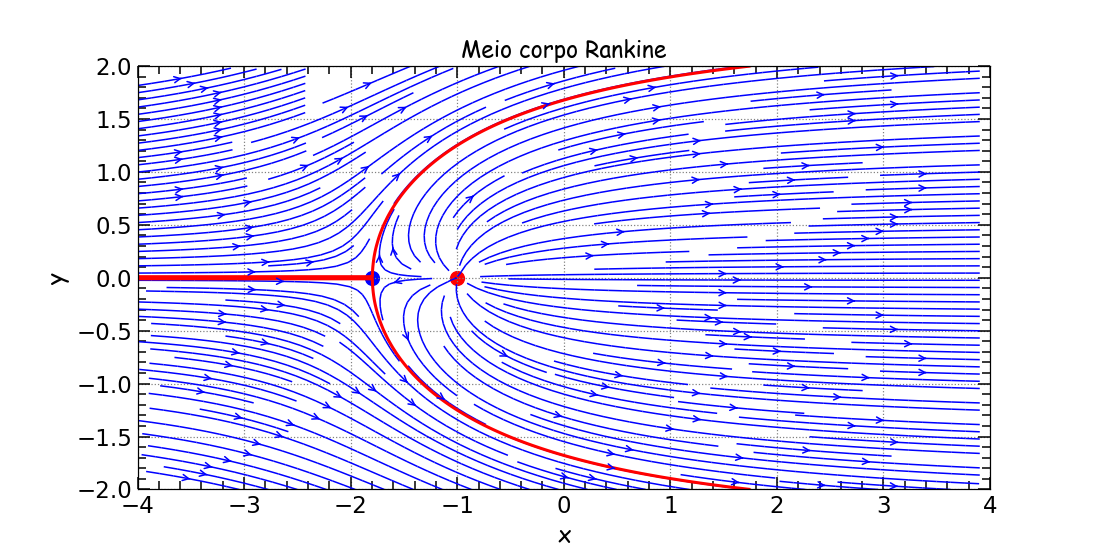

In [19]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize = (width, height))
plt.streamplot(X, Y, u, v, 
               density = 2, linewidth = 1, color = 'blue', arrowsize = 1, arrowstyle = '->')
plt.scatter(x_source, y_source, color = 'red', s = 80, marker = 'o')
plt.scatter(x_stagnation, y_stagnation, color = 'blue', s = 80, marker = 'o')
plt.contour(X, Y, psi, levels = [-strength_source/2, strength_source/2], 
            colors = 'red', linewidths = 2, linestyles = 'solid')
plt.title('Meio corpo Rankine', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
opt_plot()

plt.savefig('Meio corpo Rankine.png')

Esse formato lhe lembra alguma coisa? Perceba que destacar a divisória aerodinâmica assim nos faz imaginar um fluxo vindo da esquerda e girando para evitar um obstáculo, um objeto que possui uma forma curva, como a borda de ataque de um aerofólio.

Se ignorarmos o fluxo dentro da divisória, podemos considerá-la como um corpo sólido. Na verdade, esse possui um nome: é chamado de *meio corpo Rankine* (*Rankine half-body*, em inglês). Se a fonte for planar, então temos um caso particular conhecido como *meio corpo Rankine planar* (*Planar Rankine half-body*, em inglês).

Para um maior detalhamento acerca da descrição matemática do meio corpo Rankine, consulte a seção 4.5.2 da referência [4]. Consulte a referência [5] para mais informações acerca dos *meio corpos Rankine planares*.

#### Para refletir...

- Qual seria a largura máxima do meio corpo Rankine? (tente usar a conservação da massa e pensar no fluxo quando $x$ for muito grande!)

---

### 2.3 Par fonte-sumidouro em um fluxo uniforme

Uma pergunta que o leitor pode se fazer é a seguinte: o que aconteceria se adicionarmos um sumidouro ao padrão de fluxo obtido na seção 2.1? Bom, vamos descobrir!

Começamos definindo os parâmetros do nosso sumidouro, como a força e a localização do mesmo. Em seguida, calculamos o campo de velocidades na grade da malha usando a função `get_velocity()`. Por fim, calculamos a função de fluxo na malha da grade usando a função `get_stream_function()`:

In [20]:
strength_sink = -5.0        
x_sink, y_sink = 1.0, 0.0  

u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

A superposição da fonte, do sumidouro e do fluxo livre é apenas uma adição simples:

In [21]:
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

Finalmente, plotamos as linhas aerodinâmicas:

<IPython.core.display.Javascript object>


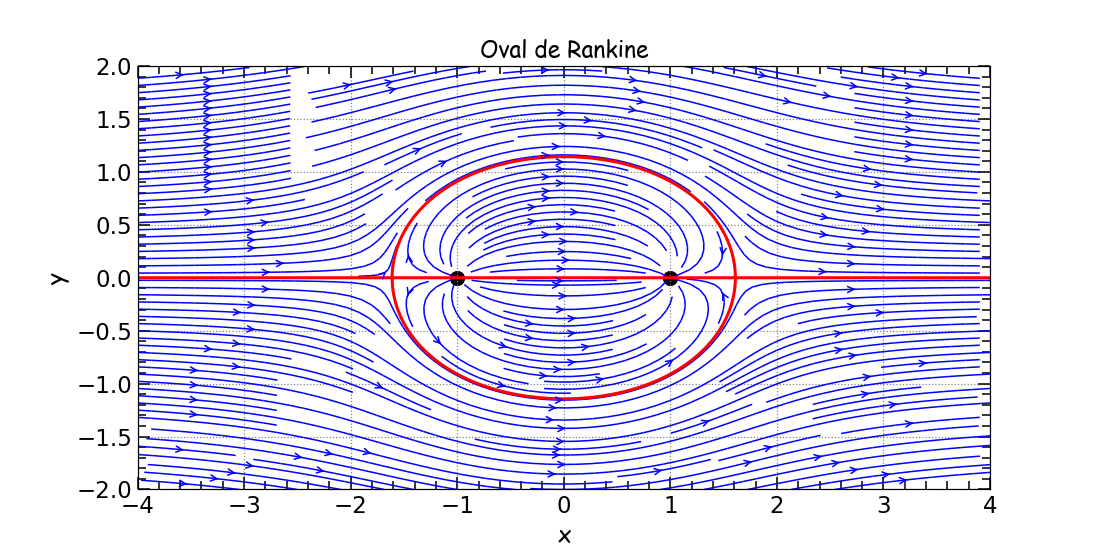

In [22]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize = (width, height))
plt.streamplot(X, Y, u, v, 
               density = 2, linewidth = 1, color = 'blue', arrowsize = 1, arrowstyle = '->')
plt.scatter([x_source, x_sink], [y_source, y_sink], color = 'black', s = 80, marker = 'o')
plt.contour(X, Y, psi, levels = [0.], colors = 'red', linewidths = 2, linestyles = 'solid')
plt.title('Oval de Rankine', family = 'fantasy', fontsize = 15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
opt_plot()

plt.savefig('Oval de Rankine.png')

Isso é verdadeiramente interessante! Note que a uma primeira vista parece que o fluxo circula em torno de um ovo, certo? Na verdade, podemos olhar para a linha elíptica fechada como uma superfície sólida e imaginar que esse é o fluxo em torno de um objeto em forma de ovo. Essa superfície sólida é chamada de *oval de Rankine*.

Você pode obter mais informações acerca da descrição matemática do oval de Rankine checando a solução do problema proposto numa lista de exercícios do curso *Advanced Fluid Mechanics* do MIT na referência [6] (o problema apresentado na lista foi retirado do livro *Fluid Mechanics*, de P. L. Kundu & I. M. Cohen [3]). Analogamente ao caso do meio corpo Rankine planar, você pode consultar na referência [7] uma descrição matemática do *corpo de Rankine* (*Rankine Body*, em inglês) de maneira mais didática e expositiva.

Agora você pode brincar com os as intensidades da fonte e do sumidouro e avaliar como o padrão de fluxo muda (caso o leitor se sinta motivado, você pode até realizar uma simulação onde a intensidade de ambos evolui no tempo). 

#### Para refletir...

- Qual seria o comprimento e a largura do oval de Rankine?

---

### 2.3 Equação de Bernoulli e o coeficiente de pressão

Uma medida muito útil de um fluxo ao redor de um corpo é o *coeficiente de pressão* $C_{P}$. Para avaliar o coeficiente de pressão, aplicamos a *equação de Bernoulli* para um fluxo incompressível:

$$\boxed{P_{\infty}+\frac{1}{2}\rho V_{\infty}^{2}=P+\frac{1}{2}\rho V^{2}}$$

Uma das condições nas quais pode-se aplicar esta equação são ao longo de uma linha aerodinâmica.

Definimos o coeficiente de pressão da seguinte maneira:

$$C_{P}=\frac{P-P_{\infty}}{\frac{1}{2}\rho V_{\infty}^{2}}\implies\boxed{C_{P}=1-\Bigg(\frac{V}{V_{\infty}}\Bigg)^{2}}$$

Observe que em um fluxo incompressível, $C_{P}=1$ em um ponto de estagnação.

Agora vamos representar graficamente o coeficiente de pressão em todo o campo de fluxos.

<IPython.core.display.Javascript object>


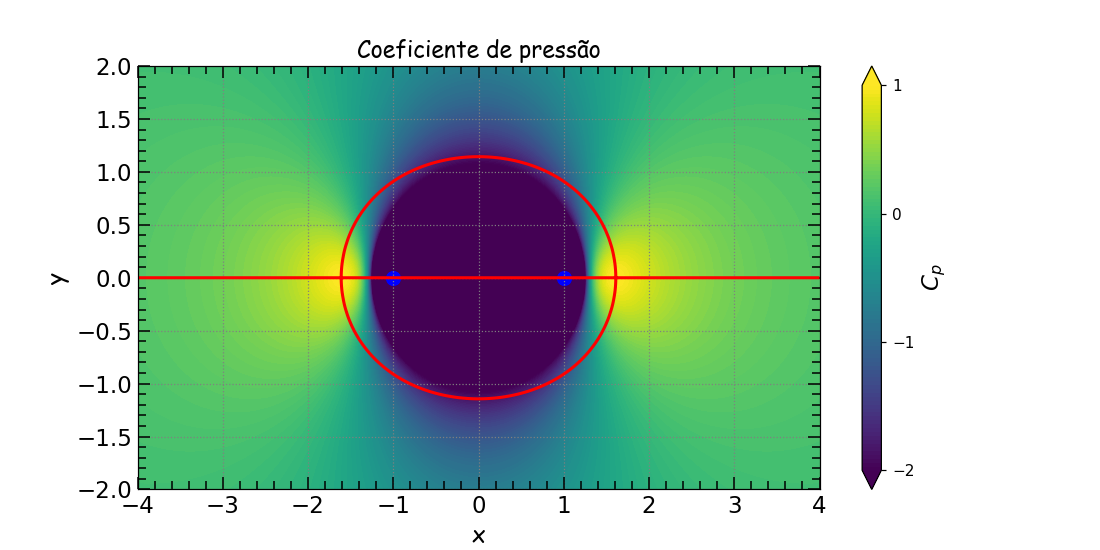

In [23]:
Cp = 1.0 - (u**2 + v**2) / u_inf**2

width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize = (width, height))

contf = plt.contourf(X, Y, Cp, levels = np.linspace(-2.0, 1.0, 100), extend = 'both')
cbar = plt.colorbar(contf)
cbar.set_label(r'$C_p$', family='fantasy', fontsize = 15)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

plt.scatter([x_source, x_sink], [y_source, y_sink], color = 'blue', s = 80, marker = 'o')
plt.contour(X, Y, psi, levels = [0.], colors = 'red', linewidths = 2, linestyles = 'solid')
plt.title('Coeficiente de pressão', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
opt_plot()

plt.savefig('Coeficiente de pressão.png')

#### Para refletir...

- Onde está localizada a pressão máxima? 

---

## 3. Dipolos

Nessa seção iremos abordar sobre o conceito de dipolos em CFD. Primeiramente, imagine um observador em repouso que está olhando para o padrão de fluxo de uma fonte e de um sumidouro de muito longe. As linhas de corrente que estão entre a fonte e o sumidouro serão muito curtas, quando vistas deste ponto. Por outro lado, as outras linhas aerodinâmicas começarão a se parecer com dois grupos de círculos, tangentes à origem. Caso o observador olhe para este padrão de fluxo a uma distância longe o suficiente, a distância entre a fonte e o sumidouro se aproxima de zero e passa a gerar um aparente novo padrão que por sua vez passa a ser visto pelo observador. Este padrão é chamado de *dipolo* (ou *dupleto*).

Primeiro, considere uma fonte (source) de intensidade $\sigma$ localizada no ponto $\big(-\frac{\ell}{2},0\big)$ e um sumidouro (sink) de intensidade oposta localizado no ponto $\big(\frac{\ell}{2},0\big)$. Eis aqui um esboço para auxiliá-lo na visualização da situação física como um todo:

![image](https://media.giphy.com/media/QvAoa8pD592ned6nbE/giphy.gif)

A função de fluxo associada ao par fonte-sumidouro, avaliada no ponto $P(x,y)$, é:

$$\psi(x,y)=\frac{\sigma}{2\pi}(\theta_{1}-\theta_{2})=-\frac{\sigma}{2\pi}\Delta\theta$$

Façamos a distância $\ell$ que separa as duas singularidades se aproximar de zero enquanto a magnitude da intensidade aumenta, de modo que o produto $\sigma\ell$ permaneça constante. No limite, este padrão de fluxo se torna um *dipolo* e defne-se sua força por $\kappa=\sigma\ell$.

A função de fluxo de um sipolo, avaliada no ponto $P(x,y)$, é dada por:

$$\psi(x,y)=\lim_{\ell\rightarrow0}\Bigg(-\frac{\sigma}{2\pi}d\theta\Bigg)$$

$$\sigma\ell=\text{constante}$$

![image](https://media.giphy.com/media/tanRJkvEjEfQrxnDvL/giphy.gif)

Considerando o caso em que $d\theta$ é infinitesimal se deduz da figura acima que:

$$a=\ell\sin{\theta}$$

$$b=r-\ell\cos{\theta}$$

$$d\theta=\frac{a}{b}=\frac{\ell\sin{\theta}}{r-\ell\cos{\theta}}$$

Dessa forma, a função de fluxo torna-se:

$$\boxed{\psi(r,\theta)=\lim_{\ell\rightarrow0}\Bigg(-\frac{\sigma\ell}{2\pi}\frac{\sin{\theta}}{r-\ell\cos{\theta}}\Bigg)=-\frac{\kappa}{2\pi}\frac{\sin{\theta}}{r}}$$

$$\sigma\ell=\text{constante}$$

Em coordenadas cartesianas, um dipolo localizado na origem possui a seguinte função de fluxo:

$$\boxed{\psi(x,y)=-\frac{\kappa}{2\pi}\frac{y}{x^{2}+y^{2}}}$$

a partir da qual podemos derivar as componentes da velocidade:

$$u(x,y)=\frac{\partial\psi}{\partial y}=-\frac{\kappa}{2\pi}\frac{x^{2}-y^{2}}{x^{2}+y^{2}}$$

$$u(x,y)=\frac{\partial\psi}{\partial y}=-\frac{\kappa}{2\pi}\frac{2xy}{x^{2}+y^{2}}$$

Agora vamos condificar e visualizar como são as linhas de fluxo. 

Analogamente ao que fizemos nas seções anteriores, começamos definindo uma grade de malha:

In [24]:
N = 50                                
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = np.linspace(x_start, x_end, N)   
y = np.linspace(y_start, y_end, N)    
X, Y = np.meshgrid(x, y)              

Vamos considerar um dipolo de intensidade $\kappa=1.0$ localizado na origem:

In [25]:
kappa = 1.0                        
x_doublet, y_doublet = 0.0, 0.0    

Agora vamos definir uma função que chamaremos de `get_velocity_doublet()` que irá calcular as componentes da velocidade do dipolo:

In [26]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = (- strength / (2 * np.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * np.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

Analogamente, definimos a função `get_stream_function_doublet()` que irá calcular a função de fluxo do dipolo:

In [27]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength / (2 * np.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

Agora chamamos nossas duas funções usando os parâmetros do dipolo: sua força `kappa` e sua localização `x_doublet`, `y_doublet`:

In [28]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

Agora estamos prontos para realizar o plot:

<IPython.core.display.Javascript object>


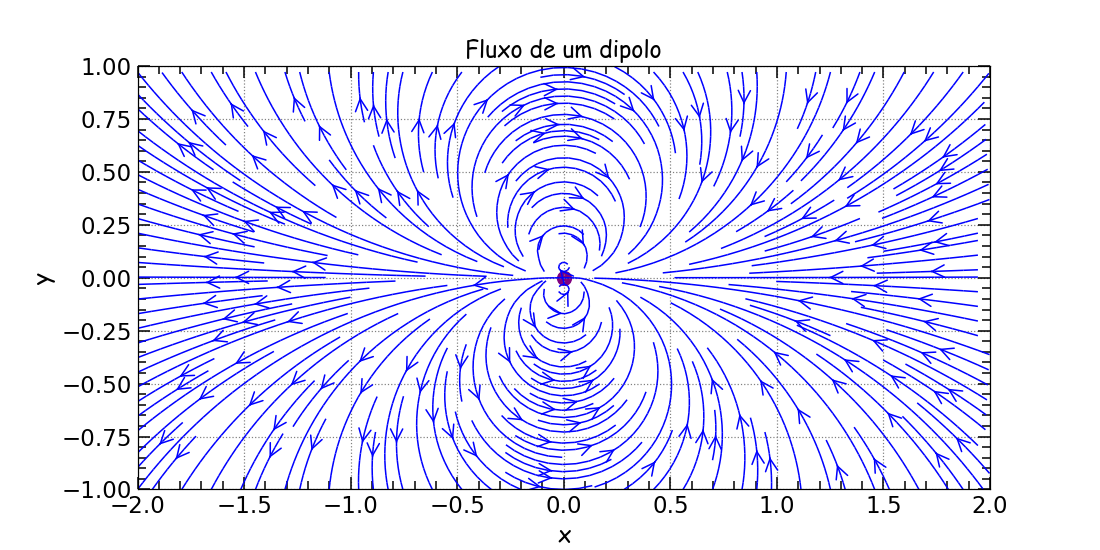

In [29]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Fluxo de um dipolo', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet, 
               density = 2, linewidth=1, arrowsize=2, color='blue', arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='purple', s=80, marker='o')
opt_plot()

plt.savefig('Fluxo de um dipolo.png')

Temos um padrão que era esperado para as linhas de fluxo de um par fonte-sumidouro quando vistas do referencial inercial de um observador distante. 

Uma pergunta que o leitor pode estar se fazendo é a seguinte: Qual a utilidade deste tipo de padrão de linhas de fluxo? Afinal, não se parece com nenhum padrão aerodinâmica que possa ter algum uso prático na aerodinâmica. Bom, a resposta para esta pergunta será melhor discutida na seção seguinte.

---

### 3.1 Fluxo uniforme sobre um dipolo

Um dipolo sozinho não fornece tantas informações sobre como o mesmo pode ser usado para representar um padrão de fluxo prático em aerodinâmica. Usando novamente o princípio da superposição: o dipolo em um fluxo uniforme acaba sendo um padrão de fluxo muito interessante. Primeiramente, define-se um fluxo horizontal uniforme:

In [30]:
u_inf = 1.0

Lembre-se que a componente cartesiana de um fluxo uniforme na direção $x$ são dados por $u=U_{\infty}$ e $v=0$. Integrando, encontramos a função de fluxo, $\psi=U_{\infty}y$.

Portanto, vamos calcular as velocidades e os valores da função de fluxo para todos os pontos na grade. E como sabemos agora, podemos calculá-los todos juntos com uma linha de código por array.

In [31]:
u_freestream = u_inf * np.ones((N, N), dtype = float)
v_freestream = np.zeros((N, N), dtype = float)

psi_freestream = u_inf * Y

A seguir, a função de fluxo do fluxo criado pela sobreposição de um dipolo em um fluxo livre é obtida por meio de uma simples adição. Como foi feito na seção 2, encontramos a linha de transmissão de divisão e a plotamos separadamente em vermelho.

O gráfico mostra que este padrão pode representar o fluxo ao redor de um cilindro com o centro no local do dipolo. Todas as linhas de fluxo restantes fora do cilindro originam-se do fluxo uniforme. Todas as linhas de fluxo dentro do cilindro podem ser ignoradas e esta área considerada um objeto sólido. Isso será muito útil.

Primeiramente realizamos a superposição do dipolo no fluxo livre:

In [32]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet

psi = psi_freestream + psi_doublet

Calculamos então os pontos de estagnação:

In [35]:
x_stagn1, y_stagn1 = +np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0

Agora podemos plotar as nossas linhas aerodinâmicas:

<IPython.core.display.Javascript object>


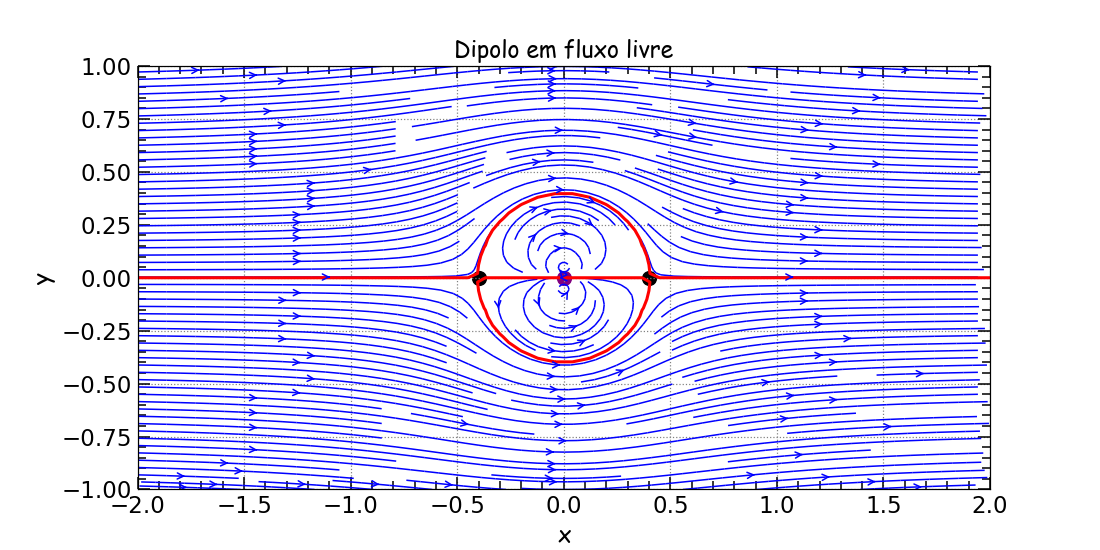

In [39]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Dipolo em fluxo livre', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density = 2, linewidth = 1, arrowsize = 1, color='blue', arrowstyle = '->')
plt.contour(X, Y, psi, levels = [0.], colors = 'red', linewidths = 2, linestyles = 'solid')
plt.scatter(x_doublet, y_doublet, color = 'purple', s = 80, marker = 'o')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color = 'black', s = 80, marker = 'o')
opt_plot()

plt.savefig('Dipolo em fluxo livre.png')

#### Para refletir...

- Qual seria o raio do cilindro circular criado por um dipolo de força $\kappa$ quando adicionado a um fluxo uniforme $U_{\infty}$ na direção $x$?

- Suponha uma função de fluxo do dipolo nas coordenadas cilíndricas acima. Adicione a função de fluxo do fluxo livre nessas coordenadas e estude-a. Você notará que $\psi=0$ em $r=a$ para todos os valores de $\theta$. A linha $\psi=0$ representa o clindro circular de raio $a$. Agora escreva as componentes da velocidade em coordenadas cilindrícas e encontre a velocidade do fluxo na superfície. O que isso diz a você?

### 3.2 Equação de Bernoulli e o coeficiente de pressão

Para avaliar o coeficiente de pressão, aplicamos a equação de Bernoulli para o fluxo ideal, que diz que ao longo de uma linha de fluxo podemos aplicar o seguinte entre dois pontos.

Analogamente ao que foi feito na seção 2.3, vamos representar graficamente o coeficiente de pressão em todo o campo de fluxos:

<IPython.core.display.Javascript object>


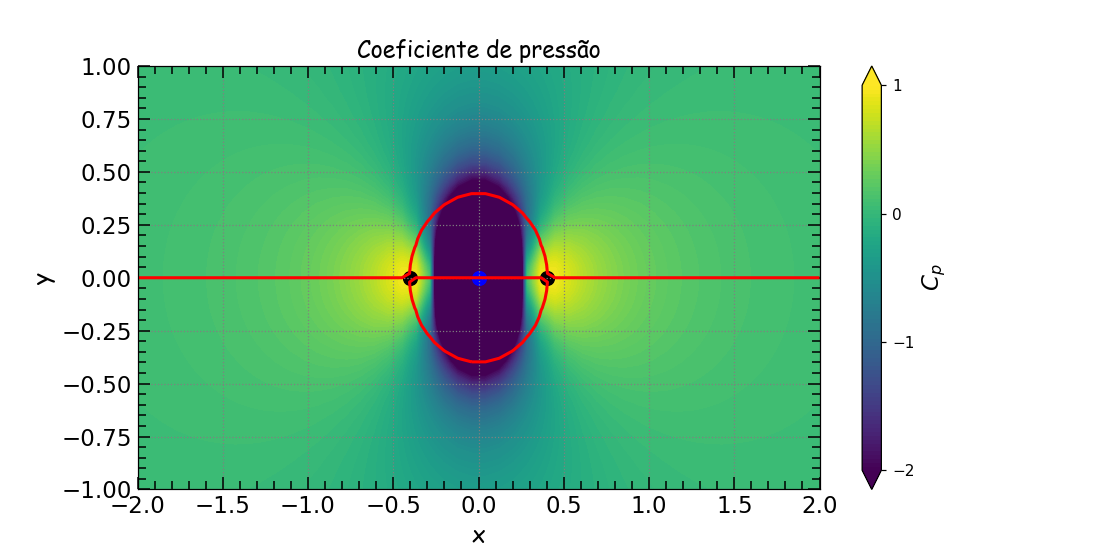

In [42]:
Cp = 1.0 - (u**2 + v**2) / u_inf**2

width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize = (width, height))

contf = plt.contourf(X, Y, Cp, levels = np.linspace(-2.0, 1.0, 100), extend = 'both')
cbar = plt.colorbar(contf)
cbar.set_label(r'$C_p$', family='fantasy', fontsize = 15)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

plt.scatter(x_doublet, y_doublet, color = 'blue', s = 80, marker = 'o')
plt.contour(X, Y, psi, levels = [0.], colors = 'red', linewidths = 2, linestyles = 'solid')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='black', s=80, marker='o')
plt.title('Coeficiente de pressão', family='fantasy', fontsize=15)
plt.xlabel('x', family='fantasy', fontsize=15)
plt.ylabel('y', family='fantasy', fontsize=15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
opt_plot()

plt.savefig('Coeficiente de pressão - Dipolo.png')

Não é estranho que o coeficiente de pressão (e a distribuição de pressão na superfície) seja simétrico em relação ao eixo vertical?

Isso significa que a pressão na frente do cilindro é igual à pressão na parte de *trás* do cilindro. Por sua vez, isso significa que as componentes horizontais das forças são zero.

Sabemos que, mesmo com um número de Reynolds muito baixo (fluxo lento), existe de fato uma força de arrasto. A teoria é incapaz de refletir esse fato experimentalmente observado! Essa discrepância é conhecida como *paradoxo de d'Alembert*.

**OBS**: Em dezembro de 2008, Hoffman & Johnson publicaram um artigo na *Journal of Mathematical Fluid Mechanics* propondo a resolução do paradoxo de d'Alembert. Você pode consultar o artigo clicando [aqui](https://sci-hub.hkvisa.net/10.1007/s00021-008-0290-1) ou checando a referência [8].

Você pode checar o aspecto do fluxo de arrasto (também conhecido como fluxo de Stokes) em torno de um cilindro nos vídeos presentes nas referências [9] e [10]. Além disso, checando a referência [11] você pode consultar um artigo acerca das soluções das equações do fluxo de Stokes.

Aqui você pode checar uma visualização famosa do fluxo real em torno de um cilindro com um número de Reynolds igual a $R=1,54$. Esta imagem foi obtida por S. Taneda e está incluída no *Album of Fluid Motion*, de Milton Van Dyke (1998) [12].

<p align="center">
  <img width="460" height="300" src="https://media.giphy.com/media/zxOj8DrHh7xL3iYDdG/giphy.gif">
</p>

#### Para refletir...

- Se você olhar com atenção ao fluxo de arrasto [9], poderá perceber que há uma ligeira assimetria no padrão de fluxo. Você poderia explicar isso? Qual é a consequência disso?

---

## 4. Para raciocinar um pouco mais...

Na seção 3, foi mostrado que é possível representar o fluxo potencial em torno de um cilindro circular usando a sobreposição de uma singularidade de dipolo e um fluxo livre. Mas o fluxo potencial é ainda mais poderoso: você pode representar o fluxo em qualquer forma. O leitor pode se perguntar: "Como é possível?"

Para corpos sem levantamento, você pode usar uma distribuição de origem na superfície do corpo, sobreposta a um fluxo livre. Nesta seção, será proposto ao leitor a construção do fluxo em torno de um aerofólio NACA 0012, usando um conjunto de fontes.

Antes de começar, pare um momento para pensar: no fluxo ao redor de um aerofólio simétrico com ângulo de ataque de $0^{\circ}$,

- Onde está o ponto de pressão máxima?
- Como chamamos esse ponto?
- O aerofólio gerará sustentação?

Ao final desta seção, volte a estas perguntas e veja se tudo faz sentido.

### 4.1 Configuração do problema

Primeiramente, leia os arquivos de dados contendo informações sobre a localização e a força de um conjunto de fontes localizadas na superfície de um aerofólio [NACA 0012](http://airfoiltools.com/airfoil/details?airfoil=n0012-il) [13].

Existem três arquivos de dados: `NACA0012_x.txt`, `NACA0012_y.txt` e `NACA0012_sigma.txt`. Os arquivos podem ser encontrados na subpasta [`Dados/NACA0012`](https://github.com/GabrielWendell/PET.py/tree/main/Dados/NACA0012) deste [repositório](https://github.com/GabrielWendell/PET.py).

Usando 51 pontos de malha em cada direção e um domínio $[-1,2]\times[-0.5,0.5]$, calcule a velocidade devido ao conjunto de fontes mais um fluxo livre na direção $x$ com direção $U_{\infty}=1$. Calcule também o coeficiente de pressão em seus pontos de grade.

### 4.2 Perguntas 

1. Qual é o valor do coeficiente de pressão máximo, $C_{P}$?
2. Quais são os índices de array para o valor máximo de $C_{P}$?

Faça os seguintes gráficos para visualizar e inspecionar o padrão de fluxo constante:

- Linhas de fluxo no domínio e no perfil do aerofólio NACA0012, em um único gráfico.
- Distribuição do coeficiente de pressão e um único marcador na localização da pressão máxima.

**OBS:** Você pode usar as seguintes funções do NumPy: [`np.unravel_index()`](https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html) e [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

### 4.3 Para refletir...

1. As linhas de fluxo estão com as esperadas?
2. O que a distribuição de pressão informa sobre a sustentação gerada pelo aerofólio?
3. A localização do ponto de pressão máxima parece correta para você?

### 4.4 Desafio

Mostre que a distribuição do coeficiente de pressão na superfície do cilindro circular é dada por:

$$\boxed{C_{P}=1-4\sin{2\theta}}$$

e plote o gráfico *coeficiente de pressão vs ângulo*.

---

## Referências

- [1] *Convecção, difusão e a equação de Burgers*: https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Convecção%2C%20difusão%20e%20a%20equação%20de%20Burgers.ipynb

- [2] *A equação de Navier-Stokes bidimensional*: https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20equação%20de%20Navier-Stokes%202D.ipynb

- [3] *Fluid Mechanics, P. L. Kundu & I. M. Cohen, April 8 2004, 3rd Ed.*: https://www.amazon.ca/Fluid-Mechanics-Ira-M-Cohen/dp/0121782530

- [4] *Evy Kersalé Notes on Fluid Mechanics - Rankine half-body, Sec. 4.5.2*: http://www1.maths.leeds.ac.uk/~kersale/2620/Notes/chapter_4.pdf

- [5] *Internet Book on Fluid Dynamics - Potential flow, Singularities, Planar Rankine half-bodies*: http://brennen.caltech.edu/fluidbook/basicfluiddynamics/potentialflow/singularities/planarrankinehalfbody.pdf

- [6] *Solution of Problem 6.4 from Fluid Mechanics by Kundu & Cohen*: https://ocw.mit.edu/courses/mechanical-engineering/2-25-advanced-fluid-mechanics-fall-2013/potential-flow-theory/MIT2_25F13_Solution6.4.pdf

- [7] *Internet Book on Fluid Dynamics - Potential flow, Singularities, Planar Rankine Body*: http://brennen.caltech.edu/fluidbook/basicfluiddynamics/potentialflow/singularities/planarrankinebody.pdf

- [8] *Resolution of d’Alembert’s Paradox, J. Hoffman & C. Johnson, 10 December 2008, Journal of Mathematical Fluid Mechanics*: https://link.springer.com/article/10.1007/s00021-008-0290-1

- [9] *Flow over a Cylinder, Rahul Singh*: https://www.youtube.com/watch?v=Ekd8czwELOc

- [10] *Flow over Cylinder - CFD OpenFOAM® simulation, CFD Support*: https://www.youtube.com/watch?v=A4WaC2V-3uA

- [11] *General solutions of the Stokes' flow equations, T. Tran-Cong & J. R. Blake, Journal of Mathematical Analysis and Applications, November 1982, Vol. 90, Issue 1*: https://doi.org/10.1016/0022-247X(82)90045-2

- [12] *Album of Fluid Motion, Milton Van Dyke (1998) - Stanford, California*: http://courses.washington.edu/me431/handouts/Album-Fluid-Motion-Van-Dyke.pdf

- [13] *NACA 0012 AIRFOILS*: http://airfoiltools.com/airfoil/details?airfoil=n0012-il

---